In [1]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy.spatial.distance import pdist as distance
from mpl_toolkits import mplot3d

In [2]:
min_dim=1
max_dim=100
pairs=100000

def make_points(n,d):
    points=[]
    for i in range(n):
        val=[]
        for j in range(d):
            val.append(random.randrange(min_dim,max_dim))
        points.append(val)
    return points

In [3]:
def euclidean_distance(data):
    dist= distance(data,metric='euclidean')
    return(dist.max(),dist.min())

In [4]:
def l1_norm_distance(data):
    dist=distance(data,metric='cityblock')
    return(dist.max(),dist.min())

In [5]:
def calculate_dist(data,c=2):
    if (c==2):
        return euclidean_distance(data)
    else:
        return l1_norm_distance(data)

In [9]:
def plot(x,y,z):
    fig=plt.figure(figsize=(10,4))
    ax=plt.axes(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_trisurf(x, y, z, cmap= 'magma', antialiased=True)
    fig.colorbar(surf, shrink=0.7, aspect=12)
    ax.set_xlabel('Number of dimensions')
    ax.set_ylabel('Number of points')
    ax.set_zlabel('Gamma value')
    plt.title('3d plot to calculate distances of random points')
    plt.show()

In [10]:
def main():
    num_points = [random.randrange(100, 1000) for i in range(pairs)]
    dimensions = [random.randrange(1, 100) for i in range(pairs)]
    gamma_l=[]
    gamma_e=[]
    
    for x,y in zip(num_points,dimensions):
        max_dist,min_dist=calculate_dist(make_points(x,y),2)
        if(min_dist!=0):
            gamma_e.append((math.log(max_dist-min_dist)/min_dist))
        else:
            gamma_e.append(0)
            
        max_dist1,min_dist1=calculate_dist(make_points(x,y),1)
        if(min_dist!=0):
            gamma_l.append((math.log(max_dist-min_dist)/min_dist))
        else:
            gamma_l.append(0)
            
    plot(dimensions,num_points,gamma_e)
    plot(dimensions,num_points,gamma_l)

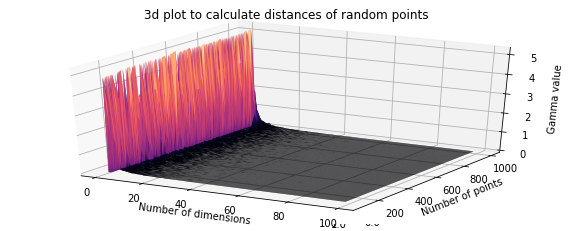

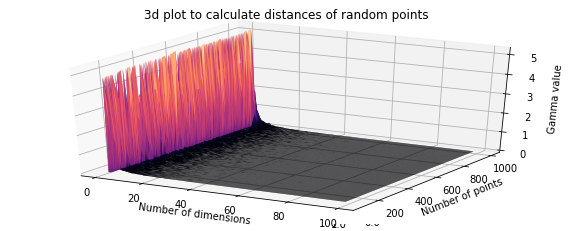

In [8]:
main()